In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

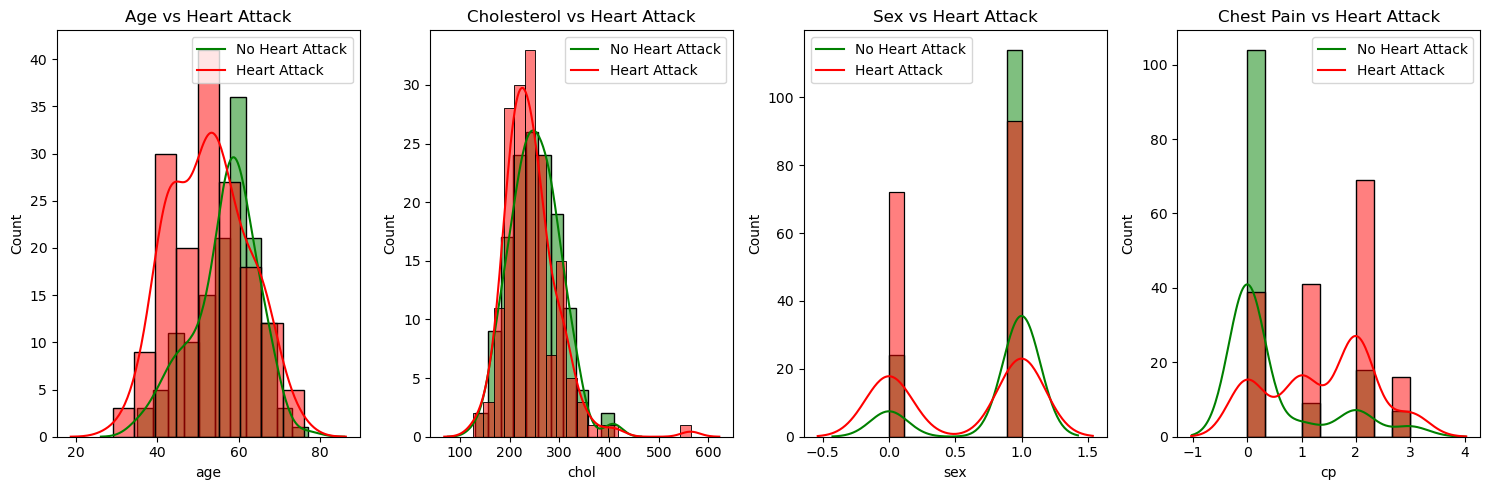

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot for age
sns.histplot(df[df['output'] == 0]['age'], color='green', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[0])
sns.histplot(df[df['output'] == 1]['age'], color='red', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[0])
axs[0].set_title('Age vs Heart Attack')
axs[0].legend(['No Heart Attack', 'Heart Attack'])

# Plot for chol
sns.histplot(df[df['output'] == 0]['chol'], color='green', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[1])
sns.histplot(df[df['output'] == 1]['chol'], color='red', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[1])
axs[1].set_title('Cholesterol vs Heart Attack')
axs[1].legend(['No Heart Attack', 'Heart Attack'])

# Plot for sex
sns.histplot(df[df['output'] == 0]['sex'], color='green', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[2])
sns.histplot(df[df['output'] == 1]['sex'], color='red', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[2])
axs[2].set_title('Sex vs Heart Attack')
axs[2].legend(['No Heart Attack', 'Heart Attack'])

sns.histplot(df[df['output'] == 0]['cp'], color='green', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[3])
sns.histplot(df[df['output'] == 1]['cp'], color='red', alpha=0.5, kde=True, kde_kws=dict(cut=3), ax=axs[3])
axs[3].set_title('Chest Pain vs Heart Attack')
axs[3].legend(['No Heart Attack', 'Heart Attack'])

plt.tight_layout()
plt.show()

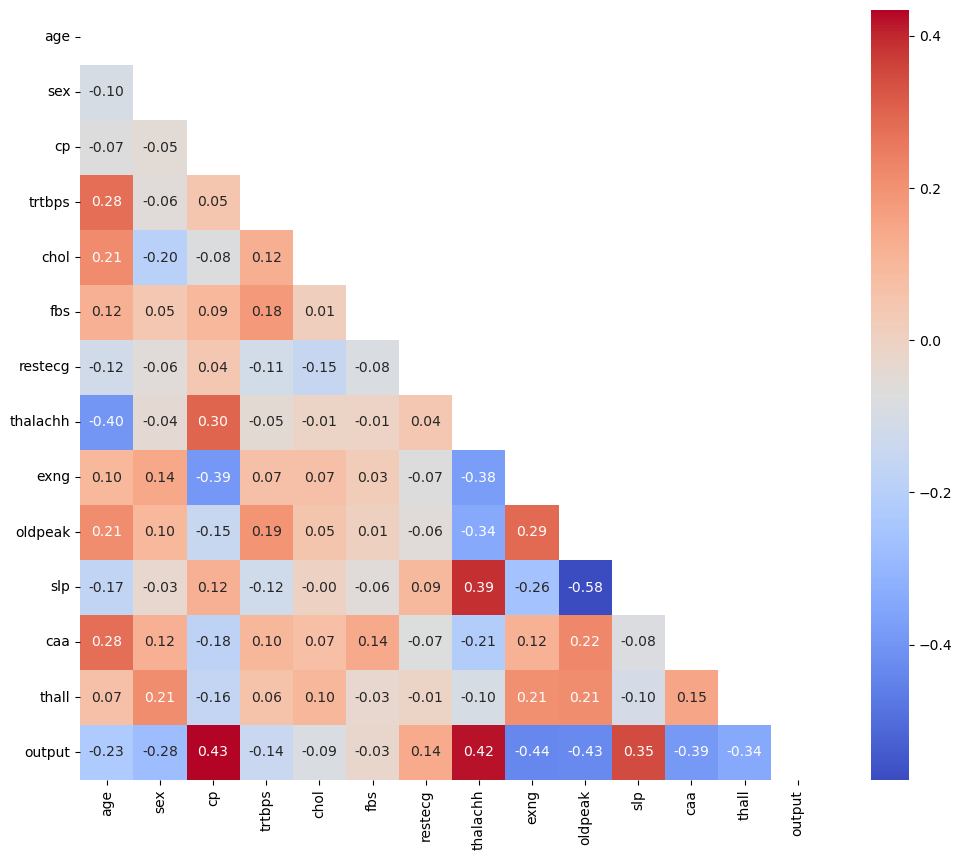

In [40]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.show()

In [49]:
from sklearn.preprocessing import StandardScaler

X = df.drop('output', axis=1)
y = df['output']

scaler = StandardScaler()
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8524590163934426


In [65]:
# create KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.8688524590163934


In [62]:
# create Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8524590163934426


In [71]:
# create XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.819672131147541


In [72]:
# create Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8360655737704918


In [73]:
# create gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8688524590163934


In [74]:
# create Bernoulli naive bayes model
from sklearn.naive_bayes import BernoulliNB

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
y_pred = bnb_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8524590163934426


In [75]:
# creat support vector machine model
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8688524590163934


### Result

So all of the above accumulates to the following result:

- accuracy scores are very similar for all models
- the best model is KNN, SVC, GaussianNB with accuracy score 0.86
- the worst model is XGBoost with accuracy score 0.81
